<a href="https://colab.research.google.com/github/Justin-Jonany/FLARE_Implementation/blob/main/notebooks_and_demonstration/2_FLARE_for_QA_RMIB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FLARE
A simple demonstration of FLARE to better answer questions! This will be used as a documentation for the FLARE_Implementation notebook and the readme page in GitHub.

All functions can be accessed in my github repository: [github.com/Justin-Jonany/FLARE_Implementation](https://github.com/Justin-Jonany/FLARE_Implementation)

In [ ]:
!git clone https://github.com/Justin-Jonany/FLARE_Implementation.git

Cloning into 'FLARE_Implementation'...
remote: Enumerating objects: 173, done.
remote: Counting objects: 100% (173/173), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 173 (delta 87), reused 134 (delta 52), pack-reused 0 (from 0)
Receiving objects: 100% (173/173), 2.87 MiB | 15.29 MiB/s, done.
Resolving deltas: 100% (87/87), done.


In [ ]:
pip install -r FLARE_Implementation/requirements.txt

In [ ]:
from FLARE_Implementation.flare import *

## Richest Man in Babylon

### Libraries

In [ ]:
pip install langchain langchain_chroma langchain_core langchain_openai langchain_text_splitters

  Using cached langchain-0.2.16-py3-none-any.whl.metadata (7.1 kB)
  Using cached langchain_chroma-0.1.3-py3-none-any.whl.metadata (1.5 kB)
  Using cached langchain_core-0.2.38-py3-none-any.whl.metadata (6.2 kB)
  Using cached langchain_openai-0.1.23-py3-none-any.whl.metadata (2.6 kB)
  Using cached langchain_text_splitters-0.2.4-py3-none-any.whl.metadata (2.3 kB)
  Using cached langsmith-0.1.117-py3-none-any.whl.metadata (13 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from langchain_chroma import Chroma
from langchain_core.documents import Document
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from google.colab import userdata
from IPython.display import Markdown

### RMIB Data

In [ ]:
data_path = 'FLARE_Implementation/rmib_dataset'
onlyfiles = [f for f in listdir(data_path) if isfile(join(data_path, f))]
onlyfiles

['13_the_gold_lender_of_babylon.txt',
 '8_the_fifth_cure.txt',
 'full_richest_man_in_babylon.txt',
 '0_a_historical_sketch_of_babylon.txt',
 'about_the_author.txt',
 '12_the_five_laws_of_gold_full.txt',
 '6_the_third_cure.txt',
 '1_the_man_who_desired_gold.txt',
 '10_the_seventh_cure.txt',
 '5_the_second_cure.txt',
 'foreword.txt',
 '2_the_richest_man_in_babylon.txt',
 '4_the_first_cure.txt',
 '7_the_fourth_cure.txt',
 '9_the_sixth_cure.txt',
 '16_the_clay_tablets_from_babylon.txt',
 '11_meet_the_goddess_of_good_luck.txt',
 '14_the_walls_of_babylon.txt',
 '17_the_luckiest_man_in_babylon.txt',
 '15_the_camel_trader_of_babylon.txt',
 '3_seven_cures_for_a_lean_purse.txt',
 'table_of_contents.txt']

In [ ]:
text_data = {}
for file_name in onlyfiles:
  with open(data_path + '/' + file_name, 'r') as f:
    text_data[file_name] = f.read()

In [ ]:
text_info = {}
for filename, text in text_data.items():
  if filename == 'full_richest_man_in_babylon.txt':
    text_type = 'full text'
    title = 'The Richest Man in Babylon'
  elif filename == 'foreword.txt':
    text_type = 'foreword'
    title = 'foreword'
  elif filename == 'table_of_contents.txt':
    text_type = 'table of contets'
    title = 'table of contents'
  elif filename == 'about_the_author.txt':
    text_type = 'about the author'
    title = 'about the author'
  else:
    text_type = 'chapter'
    title = ' '.join(''.join([i for i in filename[:-4] if not i.isdigit()]).split('_')[1:])
  text_info[filename] = [len(text), len(text.split(' ')), len(text.splitlines()), title, text_type, text_data[filename]]
df_metadata = pd.DataFrame(text_info).T.rename(columns={0:'chars', 1:'words', 2:'lines', 3:'title', 4:'type', 5:'text'})
df_metadata

,chars,words,lines,title,type,text
13_the_gold_lender_of_babylon.txt,22539,4249,397,the gold lender of babylon,chapter,The Gold Lender of Babylon \n\n\n\nFifty piece...
8_the_fifth_cure.txt,2612,478,51,the fifth cure,chapter,THE FIFTH CURE \nMake of thy dwelling a profit...
full_richest_man_in_babylon.txt,221792,40669,4073,The Richest Man in Babylon,full text,The Richest Man \nin B abvl o \n\n\n\n\nG \n\n...
0_a_historical_sketch_of_babylon.txt,11770,1946,169,a historical sketch of babylon,chapter,An Historical Sketch of Babylon \n\nIn the pag...
about_the_author.txt,830,134,14,about the author,about the author,About the author \n\nGEORGE SAMUEL CLASON was ...
12_the_five_laws_of_gold_full.txt,9133,1696,160,the five laws of gold full,chapter,"The Five Laws of Gold \n\n""A bag heavy with go..."
6_the_third_cure.txt,3728,665,60,the third cure,chapter,"THE THIRD CURE \nMake thy gold multiply \n\n""B..."
1_the_man_who_desired_gold.txt,11576,2107,180,the man who desired gold,chapter,"The Man Who Desired Gold \n\nBansir, the chari..."
10_the_seventh_cure.txt,5006,916,96,the seventh cure,chapter,THE SEVENTH CURE \nIncrease thy ability to ear...
5_the_second_cure.txt,3901,694,74,the second cure,chapter,THE SECOND CURE \nControl thy expenditures \n\...


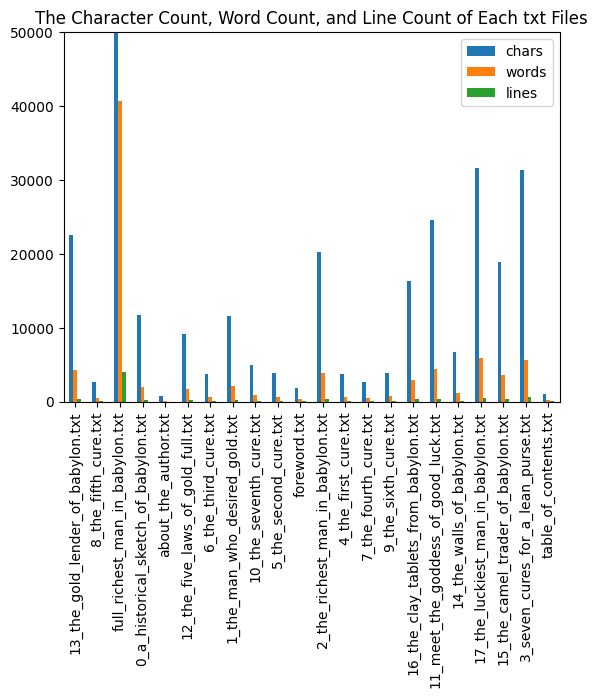

In [ ]:
df_metadata.plot(kind='bar')
plt.ylim(0, 50000)
plt.title('The Character Count, Word Count, and Line Count of Each txt Files')
plt.show()

In [ ]:
df_questions = pd.read_csv('FLARE_Implementation/questions', index_col=['chapter', 'index'])

In [ ]:
question_1 = df_questions.loc['meet the goddess of good luck', 0]['hard']
print(question_1)

Why did Arkad believe that good luck follows opportunity?


### FLARE

In [ ]:
# we do the same thing as before but with bigger chunks
recursive_text_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n","\n", " "],
    chunk_size = 1200,
    chunk_overlap = 100,
    # length_function = len,
    is_separator_regex=False
)

splits = []
for i in range(len(df_metadata)):
  if df_metadata.loc[df_metadata.index[i]].type == 'full text':
    continue
  temp_splits = recursive_text_splitter.create_documents(texts=[df_metadata.loc[df_metadata.index[i]].text])
  for temp_split in temp_splits:
    temp_split.page_content = f'chapter: {df_metadata.loc[df_metadata.index[i]].title}\ntype: {df_metadata.loc[df_metadata.index[i]].type}\n\n' + temp_split.page_content
    splits.append(temp_split)


embeddings = OpenAIEmbeddings(api_key=userdata.get('OPENAI_API_KEY'))
vector_store = Chroma(
    collection_name="rmib",
    embedding_function=embeddings,
)
vector_store.add_documents(documents=splits, ids=[f'id_{i}' for i in range(1, len(splits) + 1)]);
retriever = vector_store.as_retriever(search_kwargs={"k": 8})

In [ ]:
original_answer_1, annotated_answer_1, final_answer_1 = flare(question_1, retriever, userdata.get('OPENAI_API_KEY'))

/content/FLARE_Implementation/flare.py:24: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use invoke instead.
  context = retriever.get_relevant_documents(question)


Question: Why did Arkad believe that good luck follows opportunity?
Answer: Arkad believed that good luck follows opportunity because he observed that those who are proactive and willing to seize opportunities attract the attention of the goddess of good luck. He stated, "Good luck... often follows opportunity but seldom comes otherwise." This sentiment reflects the idea that individuals who take action and are eager to improve their circumstances are more likely to experience favorable outcomes. The discussion emphasizes that good luck is not merely a random occurrence but is closely tied to the willingness to act on available opportunities. Arkad's position suggests that success is not solely based on luck but is significantly influenced by one's initiative and ability to capitalize on the chances that arise in life.
Annotated Answer: Arkad believed that good luck follows opportunity because he observed [Search(Who are the people described as proactive in the context of good luck and

In [ ]:
print(final_answer_1.choices[0].message.content)

Arkad believed that good luck follows opportunity because he observed that those who are proactive and willing to seize opportunities are more likely to attain success. He noted that proactive individuals recognize and act on their chances, as reflected in the discussion, where it was emphasized that "some grasped theirs and moved steadily to the gratification of their deepest desires." Such individuals attract the attention of the goddess of good luck, as engaging in actions that demonstrate initiative and effort draws favorable outcomes. Arkad stated, "Good luck... often follows opportunity but seldom comes otherwise," signifying that success is closely tied to one’s willingness to take initiative. This sentiment underscores that good luck is not simply random; it often correlates with the readiness to act on the opportunities that life presents. Arkad's position further suggests that while not every attempt may yield immediate results, those committed to pursuing opportunities throu

In [ ]:
question_2 = 'Who are the characters mentioned in the chapter titled "The Gold Lender of Babylon"'
print(question_2)

Who are the characters mentioned in the chapter titled "The Gold Lender of Babylon"


In [ ]:
original_answer_2, annotated_answer_2, final_answer_2 = flare(question_2, retriever, userdata.get('OPENAI_API_KEY'), verbose=False)

In [ ]:
print("Original Answer:")
print(original_answer_2.choices[0].message.content)
print('====================================================================================================')
print("Annotated Answer:")
print(annotated_answer_2.choices[0].message.content)
print('====================================================================================================')
print("Final Answer:")
print(final_answer_2.choices[0].message.content)


Original Answer:
The characters mentioned in the chapter "The Gold Lender of Babylon" include:

1. **Rodan** - The spearmaker of old Babylon who has come into possession of fifty pieces of gold.
2. **Mathon** - The gold lender who provides Rodan with insights on lending and borrowing money.
3. **Nebatur** - A camel trader who borrows money from Mathon using a pack rope as security.
4. **The farmer of Nineveh** - Mentioned in a story about understanding the language of animals and their hard lives.
5. **Rodan’s sister** - Although not named, she is referenced as a respected woman related to Rodan, and her husband is discussed in terms of borrowing gold.
6. **Rodan's sister's husband** - Implied to be seeking a loan but lacks the necessary skills for successful trading.
7. **A woman** - A character mentioned who has no name but is described as a borrower who has a son she wants to make a merchant.

These characters contribute to the themes of lending, borrowing, and the wisdom needed in 